In [112]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [113]:
df=pd.read_csv('https://gist.githubusercontent.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [114]:
df.size, df.shape

(30000, (10000, 3))

In [115]:
df.Weight=df.Weight.apply(lambda x: x*0.453)

In [116]:
df2=df.drop('Gender',axis=1)
df2.head()

,Height,Weight
0,73.847017,109.577784
1,68.781904,73.526644
2,74.110105,96.371608
3,71.730978,99.679239
4,69.881796,93.476460


In [117]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,73.132482
std,3.847528,14.545123
min,54.263133,29.309157
25%,63.505620,61.525577
50%,66.318070,73.029456
75%,69.174262,84.787795
max,78.998742,122.305333


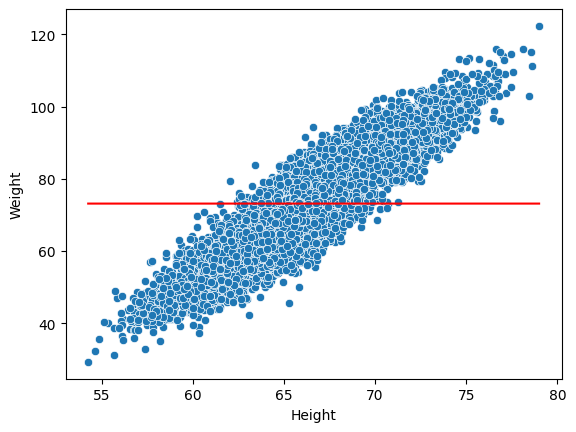

In [118]:
p=sb.scatterplot(x=df2.Height,y=df2.Weight)
sb.lineplot(x=df2.Height,y=df2.Weight.mean(),c='red')
plt.show()

<Axes: >

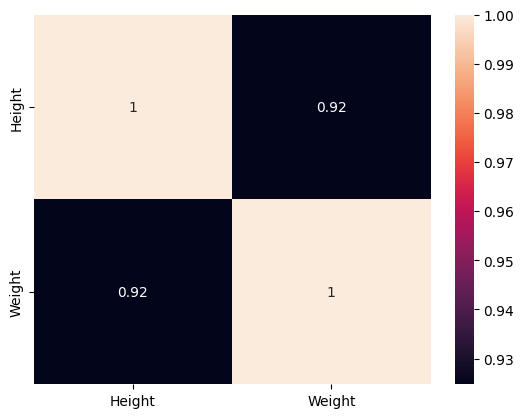

In [119]:
sb.heatmap(df2.corr(),annot=True)

In [120]:
x=pd.DataFrame(df2.Height) #Or x=df2[['Height']]
type(x)

pandas.core.frame.DataFrame

In [146]:
type(df2.Height)

pandas.core.series.Series

In [121]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [122]:
y=df2.Weight
y.head()

0    109.577784
1     73.526644
2     96.371608
3     99.679239
4     93.476460
Name: Weight, dtype: float64

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
x_train.size,x_test.size

(8000, 2000)

In [124]:
type(y_test)

pandas.core.series.Series

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [129]:
model.coef_, model.intercept_  #h(x)=b0 + b1x

(array([13.44275062]), np.float64(73.22802099660983))

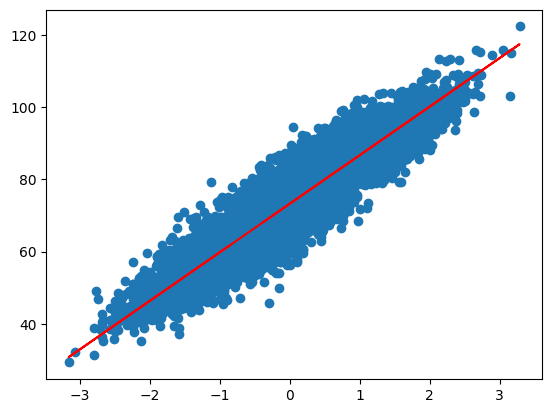

In [130]:
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train),c='red')

In [131]:
y_pred=model.predict(x_test)
y_pred

array([85.52500362, 82.65846269, 64.64291265, ..., 70.04079728,
       64.95857008, 90.84868855], shape=(2000,))

In [132]:
model.score(x_test,y_test)  #R^2

0.8501385418470461

In [133]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [134]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
mse, mae, rmse, r2

(31.99406170802915,
 4.496502635939947,
 np.float64(5.65632934932445),
 0.8501385418470461)

In [135]:
#OLS techniques
import statsmodels.api as sm

In [136]:
model=sm.OLS(endog=y_train,exog=x_train).fit()

In [137]:
model.predict(x_test)

array([12.29698262,  9.43044169, -8.58510835, ..., -3.18722372,
       -8.26945092, 17.62066755], shape=(2000,))

In [138]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              268.0
Date:                Tue, 31 Dec 2024   Prob (F-statistic):                    2.77e-59
Time:                        12:08:05   Log-Likelihood:                         -45723.
No. Observations:                8000   AIC:                                  9.145e+04
Df Residuals:                    7999   BIC:                                  9.145e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            13.4428      0.821     16.372      0.000      11.833      15.052
==============================================================================
Omnibus:                        1.458   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                1.491
Skew:                           0.030   Prob(JB):                        0.474
Kurtosis:                       2.969   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
model.predict(scaler.transform(np.array([[72]])))

d:\ML\3\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([19.65322696])

In [151]:
type(x_test),type(np.array([[72]]))

(numpy.ndarray, numpy.ndarray)

In [165]:
np.reshape([1,2,3,4,5,6],shape=(len([1,2,3,4,5,6]),1))

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])